In [3]:
import pandas as pd

In [4]:
import numpy as np

In [5]:
import matplotlib.pyplot as plt

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
from sklearn.linear_model import LinearRegression as LR

In [8]:
from sklearn.ensemble import RandomForestRegressor

In [9]:
from sklearn.metrics import mean_squared_error as MSE

In [11]:
from sklearn.model_selection import KFold

In [12]:
seed = 42

In [14]:
from matplotlib import pyplot

In [15]:
from sklearn.neighbors import KNeighborsRegressor

In [16]:
pip install lightgbm

Note: you may need to restart the kernel to use updated packages.


In [17]:
import lightgbm as lgb

In [179]:
train = pd.read_csv("train.csv")

In [180]:
test = pd.read_csv("test.csv")

1. 各変数（remarks, event, payday）についてダミー作成

In [181]:
for i in range(0, 337):
    if train["remarks"][i] == "none":
        train["remarks"][i] = 0
    else:
        train["remarks"][i] = 1

<ipython-input-181-f752d200e5e4>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train["remarks"][i] = 1


In [182]:
train['event'] = train['event'].fillna('none')

In [183]:
for i in range(0, 337):
    if train['event'][i] == "none":
        train['event'][i] = 0
    else:
        train['event'][i] = 1

<ipython-input-183-9fb6ad1b555c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['event'][i] = 0
<ipython-input-183-9fb6ad1b555c>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['event'][i] = 1


In [184]:
train['payday'] = train['payday'].fillna('none')

In [185]:
for i in range(0, 337):
    if train['payday'][i] == "none":
        train['payday'][i] = 0
    else:
        train['payday'][i] = 1

<ipython-input-185-46e04fb71acc>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['payday'][i] = 0
<ipython-input-185-46e04fb71acc>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['payday'][i] = 1


In [186]:
pd.get_option("display.max_columns")

300

2．弁当の名前を調理法ごとに分類

In [187]:
train['name'].value_counts()

メンチカツ               9
タンドリーチキン            7
カレーライス              6
ポークカレー              6
親子煮                 6
豚キムチ炒め              6
麻婆豆腐                5
ポーク生姜焼き             5
豚肉のマスタード焼き          5
チンジャオロース            4
酢豚                  4
豚柳川                 4
手作りチキンカツ            4
チーズメンチカツ            4
チキンカレー              4
鶏肉の唐揚げ              4
エビフライ               4
自家製手作りトンカツ          3
ビーフストロガノフ           3
鶏の味噌漬け焼き            3
塩唐揚げ                3
肉じゃが                3
牛丼風煮                3
白身魚ムニエル             3
白身魚カレームニエル          3
手作りロースカツ            3
バーベキューチキン           3
キーマカレー              3
ビーフシチュー             2
牛肉コロッケ              2
手作りトンカツ             2
マーボ茄子               2
牛丼風                 2
八宝菜                 2
鶏の唐揚げおろしソース         2
サーモンのムニエル2色ソース      2
チーズハンバーグ            2
夏野菜カレー              2
ガーリックトマトチキン         2
油淋鶏                 2
炊き込みご飯              2
ミックスグリル             2
チキン山賊焼き             2
カレーライス(ポークカレー)      2
チキンの辛味噌焼き           2
彩り野菜と鶏肉の黒酢

In [188]:
train2 = train

In [189]:
for i in range(0, 337):
    if "カツ" in train2['name'][i]:
        train2['name'][i] = "deepfried"
    elif "魚" in train2['name'][i]:
          train2['name'][i] = "fish"
    elif "カレー" in train2['name'][i]:
          train2['name'][i] = "curry"

<ipython-input-189-fa6ce582e127>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train2['name'][i] = "deepfried"
<ipython-input-189-fa6ce582e127>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train2['name'][i] = "curry"
<ipython-input-189-fa6ce582e127>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train2['name'][i] = "fish"


In [190]:
for i in range(0, 337):
    if "フライ" in train2['name'][i]:
        train2['name'][i] = "deepfried"
    elif "サーモン" in train2['name'][i]:
          train2['name'][i] = "fish"
    elif "ハンバーグ" in train2['name'][i]:
          train2['name'][i] = "hamburg"

<ipython-input-190-80a223268f06>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train2['name'][i] = "hamburg"
<ipython-input-190-80a223268f06>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train2['name'][i] = "fish"
<ipython-input-190-80a223268f06>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train2['name'][i] = "deepfried"


In [191]:
for i in range(0, 337):
    if "コロッケ" in train2['name'][i]:
        train2['name'][i] = "deepfried"
    elif "カレイ" in train2['name'][i]:
          train2['name'][i] = "fish"
    elif "揚げ" in train2['name'][i]:
          train2['name'][i] = "deepfried"

<ipython-input-191-0fff8ede5cd6>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train2['name'][i] = "deepfried"
<ipython-input-191-0fff8ede5cd6>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train2['name'][i] = "fish"
<ipython-input-191-0fff8ede5cd6>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train2['name'][i] = "deepfried"


In [192]:
for i in range(0, 337):
    if "かつ" in train2['name'][i]:
        train2['name'][i] = "deepfried"
    elif "キス" in train2['name'][i]:
          train2['name'][i] = "fish"
    elif "煮" in train2['name'][i]:
          train2['name'][i] = "boiled"

<ipython-input-192-ec0e9ed2b362>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train2['name'][i] = "boiled"
<ipython-input-192-ec0e9ed2b362>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train2['name'][i] = "deepfried"
<ipython-input-192-ec0e9ed2b362>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train2['name'][i] = "fish"


In [193]:
for i in range(0, 337):
    if "炒め" in train2['name'][i]:
        train2['name'][i] = "fried"
    elif "ぶり" in train2['name'][i]:
          train2['name'][i] = "fish"
    elif "天ぷら" in train2['name'][i]:
          train2['name'][i] = "deepfried"

<ipython-input-193-35ab8796fffc>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train2['name'][i] = "fried"
<ipython-input-193-35ab8796fffc>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train2['name'][i] = "deepfried"
<ipython-input-193-35ab8796fffc>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train2['name'][i] = "fish"


In [194]:
for i in range(0, 337):
    if "焼き" in train2['name'][i]:
        train2['name'][i] = "fried"
    elif "麺" in train2['name'][i]:
          train2['name'][i] = "noodles"
    elif "飯" in train2['name'][i]:
          train2['name'][i] = "rice"
    elif "丼" in train2['name'][i]:
          train2['name'][i] = "rice"

<ipython-input-194-7c754ca4c6b2>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train2['name'][i] = "fried"
<ipython-input-194-7c754ca4c6b2>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train2['name'][i] = "rice"
<ipython-input-194-7c754ca4c6b2>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train2['name'][i] = "rice"
<ipython-input-194-7c754ca4c6b2>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice f

In [195]:
for i in range(0, 337):
    if "タンドリーチキン" in train2['name'][i]:
        train2['name'][i] = "fried"
    elif "ソテー" in train2['name'][i]:
          train2['name'][i] = "fried"
    elif "うどん" in train2['name'][i]:
          train2['name'][i] = "noodles"
    elif "油" in train2['name'][i]:
          train2['name'][i] = "deepfried"

<ipython-input-195-40fdebb7e195>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train2['name'][i] = "fried"
<ipython-input-195-40fdebb7e195>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train2['name'][i] = "fried"
<ipython-input-195-40fdebb7e195>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train2['name'][i] = "deepfried"


In [196]:
for i in range(0, 337):
    if "ステーキ" in train2['name'][i]:
        train2['name'][i] = "fried"
    elif "シチュー" in train2['name'][i]:
          train2['name'][i] = "soup"
    elif "チキン" in train2['name'][i]:
          train2['name'][i] = "fried"

<ipython-input-196-d8486688f2dd>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train2['name'][i] = "soup"
<ipython-input-196-d8486688f2dd>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train2['name'][i] = "fried"
<ipython-input-196-d8486688f2dd>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train2['name'][i] = "fried"


In [197]:
for i in range(0, 337):
    if "酢豚" in train2['name'][i]:
        train2['name'][i] = "deepfried"
    elif "鶏" in train2['name'][i]:
          train2['name'][i] = "fried"
    elif "豚" in train2['name'][i]:
          train2['name'][i] = "fried"

<ipython-input-197-9249dc16628f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train2['name'][i] = "deepfried"
<ipython-input-197-9249dc16628f>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train2['name'][i] = "fried"
<ipython-input-197-9249dc16628f>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train2['name'][i] = "fried"


In [198]:
for i in range(0, 337):
    if "麻婆" in train2['name'][i]:
        train2['name'][i] = "fried"
    elif "マーボ" in train2['name'][i]:
          train2['name'][i] = "fried"
    elif "ロース" in train2['name'][i]:
          train2['name'][i] = "fried"

<ipython-input-198-d829adcb728d>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train2['name'][i] = "fried"
<ipython-input-198-d829adcb728d>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train2['name'][i] = "fried"
<ipython-input-198-d829adcb728d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train2['name'][i] = "fried"


In [201]:
train2["name"] = train2["name"].replace("ビーフストロガノフ", "boiled")
train2["name"] = train2["name"].replace("肉じゃが", "boiled")
train2["name"] = train2["name"].replace("八宝菜", "fried")
train2["name"] = train2["name"].replace("かに玉・甘酢たれ", "fried")
train2["name"] = train2["name"].replace("回鍋肉", "fried")
train2["name"] = train2["name"].replace("プルコギ", "fried")
train2["name"] = train2["name"].replace("ゴーヤチャンプル", "fried")
train2["name"] = train2["name"].replace("ミックスグリル", "fried")
train2["name"] = train2["name"].replace("牛スキヤキ", "fried")
train2["name"] = train2["name"].replace("ランチビュッフェ", "fried")
train2["name"] = train2["name"].replace("青椒肉絲", "fried")
train2["name"] = train2["name"].replace("チャプチェ", "fried")
train2["name"] = train2["name"].replace("hamburg", "fried")
train2["name"] = train2["name"].replace("ゴーヤチャンプルー", "fried")

In [202]:
train2['name'].value_counts()

fried        143
deepfried     95
fish          28
curry         27
boiled        26
rice          11
soup           6
noodles        1
Name: name, dtype: int64

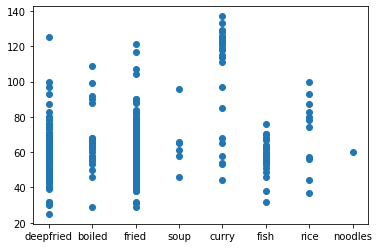

In [203]:
pyplot.scatter(train2["name"], train2["y"])

3. 日付データを「日」に直す

In [206]:
import datetime

In [207]:
train2['dateid'] = pd.to_datetime(train2['dateid'])

In [208]:
test['dateid'] = pd.to_datetime(test['dateid'])

In [209]:
train2['dateid']=train2['dateid'].dt.day

In [210]:
test['dateid']=test['dateid'].dt.day

4. 天気データを分類

In [212]:
for i in range(0, 337):
    if "雨" in train2['weather'][i]:
        train2['weather'][i] = "rainy"
    else:
        train2['weather'][i] = "sunny"

<ipython-input-212-f89ecb91baf5>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train2['weather'][i] = "sunny"
<ipython-input-212-f89ecb91baf5>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train2['weather'][i] = "rainy"


In [213]:
for i in range(0, 144):
    if "雨" in test['weather'][i]:
        test['weather'][i] = "rainy"
    else:
        test['weather'][i] = "sunny"

<ipython-input-213-d67200e0512e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['weather'][i] = "rainy"
<ipython-input-213-d67200e0512e>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['weather'][i] = "sunny"


In [217]:
train2 = pd.DataFrame(train2)

In [218]:
test = pd.DataFrame(test)

Xにテストデータを格納して整理

In [219]:
X = train2[['week','soldout', 'kcal','precipitation', 'temperature','payday','weather','remarks','name']]

In [220]:
X = pd.get_dummies(X)

In [222]:
X = X.drop(X.columns[9], axis=1)

In [223]:
X = X.drop(X.columns[11], axis=1)

In [224]:
X = X.drop(X.columns[11], axis=1)

In [225]:
X = X.rename(columns={'payday_1': 'payday'})
X = X.rename(columns={'remarks_1': 'remarks'})
X = X.rename(columns={'weather_rainy': 'rainy'})

テストデータに同様の加工を施す

In [227]:
test['remarks'] = test['remarks'].fillna("none")

In [228]:
for i in range(0, 144):
    if test["remarks"][i] == "none":
        test["remarks"][i] = 0
    else:
        test["remarks"][i] = 1

<ipython-input-228-0f59717289d3>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test["remarks"][i] = 0
<ipython-input-228-0f59717289d3>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test["remarks"][i] = 1


In [229]:
test['event'] = test['event'].fillna("none")

In [230]:
for i in range(0, 144):
    if test["event"][i] == "none":
        test["event"][i] = 0
    else:
        test["event"][i] = 1

<ipython-input-230-06373b5878db>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test["event"][i] = 0
<ipython-input-230-06373b5878db>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test["event"][i] = 1


In [231]:
test['payday'] = test['payday'].fillna('none')

In [232]:
for i in range(0, 144):
    if test['payday'][i] == "none":
        test['payday'][i] = 0
    else:
        test['payday'][i] = 1

<ipython-input-232-4bfacd516996>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['payday'][i] = 0
<ipython-input-232-4bfacd516996>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['payday'][i] = 1


In [233]:
test2 = test

In [234]:
for i in range(0, 143):
    if "カツ" in test2['name'][i]:
        test2['name'][i] = "deepfried"
    elif "魚" in test2['name'][i]:
          test2['name'][i] = "fish"
    elif "カレー" in test2['name'][i]:
          test2['name'][i] = "curry"

<ipython-input-234-ffa7ee5f38a3>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test2['name'][i] = "curry"
<ipython-input-234-ffa7ee5f38a3>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test2['name'][i] = "deepfried"
<ipython-input-234-ffa7ee5f38a3>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test2['name'][i] = "fish"


In [235]:
for i in range(0, 143):
    if "フライ" in test2['name'][i]:
        test2['name'][i] = "deepfried"
    elif "サーモン" in test2['name'][i]:
          test2['name'][i] = "fish"
    elif "ハンバーグ" in test2['name'][i]:
          test2['name'][i] = "hamburg"

<ipython-input-235-603dcc8458de>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test2['name'][i] = "deepfried"
<ipython-input-235-603dcc8458de>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test2['name'][i] = "hamburg"


In [236]:
for i in range(0, 143):
    if "コロッケ" in test2['name'][i]:
        test2['name'][i] = "deepfried"
    elif "カレイ" in test2['name'][i]:
          test2['name'][i] = "fish"
    elif "揚げ" in test2['name'][i]:
          test2['name'][i] = "deepfried"

<ipython-input-236-ea385e637013>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test2['name'][i] = "deepfried"
<ipython-input-236-ea385e637013>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test2['name'][i] = "deepfried"


In [237]:
for i in range(0, 143):
    if "かつ" in test2['name'][i]:
        test2['name'][i] = "deepfried"
    elif "キス" in test2['name'][i]:
          test2['name'][i] = "fish"
    elif "煮" in test2['name'][i]:
          test2['name'][i] = "boiled"

<ipython-input-237-2c2b27cf56a0>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test2['name'][i] = "boiled"
<ipython-input-237-2c2b27cf56a0>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test2['name'][i] = "deepfried"


In [238]:
for i in range(0, 143):
    if "炒め" in test2['name'][i]:
        test2['name'][i] = "fried"
    elif "ぶり" in test2['name'][i]:
          test2['name'][i] = "fish"
    elif "天ぷら" in test2['name'][i]:
          test2['name'][i] = "deepfried"

<ipython-input-238-d804a8b7b320>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test2['name'][i] = "fried"
<ipython-input-238-d804a8b7b320>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test2['name'][i] = "fish"
<ipython-input-238-d804a8b7b320>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test2['name'][i] = "deepfried"


In [239]:
for i in range(0, 143):
    if "焼き" in test2['name'][i]:
        test2['name'][i] = "fried"
    elif "麺" in test2['name'][i]:
          test2['name'][i] = "noodles"
    elif "飯" in test2['name'][i]:
          test2['name'][i] = "rice"
    elif "丼" in test2['name'][i]:
          test2['name'][i] = "rice"

<ipython-input-239-38e7a257aad7>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test2['name'][i] = "fried"
<ipython-input-239-38e7a257aad7>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test2['name'][i] = "rice"
<ipython-input-239-38e7a257aad7>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test2['name'][i] = "rice"


In [240]:
for i in range(0, 143):
    if "タンドリーチキン" in test2['name'][i]:
        test2['name'][i] = "fried"
    elif "ソテー" in test2['name'][i]:
          test2['name'][i] = "fried"
    elif "うどん" in test2['name'][i]:
          test2['name'][i] = "noodles"
    elif "油" in test2['name'][i]:
          test2['name'][i] = "deepfried"

<ipython-input-240-b5e9dff8a1ac>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test2['name'][i] = "deepfried"
<ipython-input-240-b5e9dff8a1ac>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test2['name'][i] = "fried"
<ipython-input-240-b5e9dff8a1ac>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test2['name'][i] = "fried"


In [241]:
for i in range(0, 143):
    if "ステーキ" in test2['name'][i]:
        test2['name'][i] = "fried"
    elif "シチュー" in test2['name'][i]:
          test2['name'][i] = "soup"
    elif "チキン" in test2['name'][i]:
          test2['name'][i] = "fried"

<ipython-input-241-af6ed05d2e4f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test2['name'][i] = "fried"
<ipython-input-241-af6ed05d2e4f>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test2['name'][i] = "fried"
<ipython-input-241-af6ed05d2e4f>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test2['name'][i] = "soup"


In [242]:
for i in range(0, 143):
    if "酢豚" in test2['name'][i]:
        test2['name'][i] = "deepfried"
    elif "鶏" in train2['name'][i]:
          test2['name'][i] = "fried"
    elif "豚" in test2['name'][i]:
          test2['name'][i] = "fried"

<ipython-input-242-d8babfc551a0>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test2['name'][i] = "deepfried"
<ipython-input-242-d8babfc551a0>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test2['name'][i] = "fried"


In [243]:
for i in range(0, 143):
    if "麻婆" in test2['name'][i]:
        test2['name'][i] = "fried"
    elif "マーボ" in test2['name'][i]:
          test2['name'][i] = "fried"
    elif "ロース" in test2['name'][i]:
          test2['name'][i] = "fried"

<ipython-input-243-1d63f6afe513>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test2['name'][i] = "fried"
<ipython-input-243-1d63f6afe513>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test2['name'][i] = "fried"


In [249]:
test2["name"] = test2["name"].replace("ビーフストロガノフ", "boiled")
test2["name"] = test2["name"].replace("肉じゃが", "boiled")
test2["name"] = test2["name"].replace("八宝菜", "fried")
test2["name"] = test2["name"].replace("かに玉・甘酢たれ", "fried")
test2["name"] = test2["name"].replace("回鍋肉", "fried")
test2["name"] = test2["name"].replace("プルコギ", "fried")
test2["name"] = test2["name"].replace("ゴーヤチャンプル", "fried")
test2["name"] = test2["name"].replace("ミックスグリル", "fried")
test2["name"] = test2["name"].replace("牛スキヤキ", "fried")
test2["name"] = test2["name"].replace("ランチビュッフェ", "fried")
test2["name"] = test2["name"].replace("青椒肉絲", "fried")
test2["name"] = test2["name"].replace("チャプチェ", "fried")
test2["name"] = test2["name"].replace("hamburg", "fried")
test2["name"] = test2["name"].replace("おでん", "fried")

In [252]:
for i in range(0, 143):
    if "チリソース" in test2['name'][i]:
        test2['name'][i] = "fried"
    elif "焼" in test2['name'][i]:
          test2['name'][i] = "fried"
    elif "アジ" in test2['name'][i]:
          test2['name'][i] = "fish"

<ipython-input-252-95cba4c60701>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test2['name'][i] = "fried"
<ipython-input-252-95cba4c60701>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test2['name'][i] = "fried"
<ipython-input-252-95cba4c60701>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test2['name'][i] = "fish"


In [254]:
test2["name"] = test2["name"].replace("肉豆腐", "boiled")
test2["name"] = test2["name"].replace("ぶり照り焼き・根菜添え", "fish")

In [255]:
test2["name"].value_counts()

fried        58
deepfried    44
curry        20
boiled       10
fish          7
rice          3
soup          2
Name: name, dtype: int64

In [257]:
test2 = test2[['week', 'soldout', 'kcal','precipitation', 'temperature','payday','weather','remarks','name']]

In [258]:
test2 = pd.get_dummies(test2)

In [259]:
test2.head()

,soldout,kcal,precipitation,temperature,week_Fri,week_Mon,week_Thu,week_Tue,week_Wed,payday_0,payday_1,weather_rainy,weather_sunny,remarks_0,remarks_1,name_boiled,name_curry,name_deepfried,name_fish,name_fried,name_rice,name_soup
0,0,428.0,19.0,23.0,0,1,0,0,0,1,0,1,0,1,0,0,0,0,0,1,0,0
1,0,420.0,65.5,20.0,0,0,0,1,0,1,0,1,0,1,0,0,0,0,0,1,0,0
2,0,456.0,156.5,22.4,0,0,0,0,1,1,0,1,0,1,0,0,0,0,0,1,0,0
3,1,439.0,50.0,21.8,0,0,1,0,0,0,1,1,0,1,0,0,0,1,0,0,0,0
4,0,NaN,0.0,23.9,1,0,0,0,0,1,0,0,1,0,1,0,1,0,0,0,0,0


In [263]:
test2 = test2.drop(test2.columns[9], axis=1)

In [264]:
test2 = test2.drop(test2.columns[11], axis=1)

In [265]:
test2 = test2.drop(test2.columns[11], axis=1)

In [266]:
test2 = test2.rename(columns={'payday_1': 'payday'})
test2 = test2.rename(columns={'remarks_1': 'remarks'})
test2 = test2.rename(columns={'weather_rainy': 'rainy'})

変数の数を合わせる

In [268]:
def fill_missing_columns(X, test2):
    columns_for_test2 = set(X.columns) - set(test2.columns)
    for column in columns_for_test2:
        test2[column] = 0
    columns_for_X = set(test2.columns) - set(X.columns)
    for column in columns_for_X:
        X[column] = 0

In [269]:
fill_missing_columns(X, test2)

X.sort_index(axis=1, inplace=True)
test2.sort_index(axis=1, inplace=True)

In [270]:
y = train2['y'] 

train_test_split

In [271]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.01, random_state = 0)

In [272]:
X_train.head()

,kcal,name_boiled,name_curry,name_deepfried,name_fish,name_fried,name_noodles,name_rice,name_soup,payday,precipitation,rainy,remarks,soldout,temperature,week_Fri,week_Mon,week_Thu,week_Tue,week_Wed
199,430.0,1,0,0,0,0,0,0,0,0,0.0,0,0,1,4.7,0,0,0,1,0
235,443.0,0,0,0,0,1,0,0,0,0,0.0,0,0,0,12.3,1,0,0,0,0
15,382.0,0,0,0,0,1,0,0,0,0,4.5,1,0,1,15.2,0,0,0,1,0
318,423.0,0,0,1,0,0,0,0,0,0,0.0,1,0,1,29.1,0,0,1,0,0
63,363.0,0,0,0,0,1,0,0,0,0,0.0,0,0,1,25.8,0,0,0,0,1


In [273]:
X.shape

(337, 20)

7. lightgbmで学習

In [278]:
lgb_train = lgb.Dataset(X_train, y_train)
lgb_eval = lgb.Dataset(X_test, y_test, reference=lgb_train) 

# LightGBM parameters
params = {
        'task': 'train',
        'boosting_type': 'gbdt',
        'objectivee': 'regression', # 目的 : 回帰  
        'metric': {'rmse'}, # 評価指標 : rsme(平均二乗誤差の平方根) 
        'early_stopping_rounds':10,
        'n_estimators' : 10000
         }

# モデルの学習
model = lgb.train(params = params,
                  train_set=lgb_train, # トレー_ニングデータの指定
                  valid_sets=[lgb_train, lgb_eval], # 検証データの指定
                  )

#clf = lgb.LGBMRegressor()
#clf.fit(X_train, y_train)

[LightGBM] [Warning] Unknown parameter: objectivee
[LightGBM] [Warning] Unknown parameter: objectivee
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000435 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 196
[LightGBM] [Info] Number of data points in the train set: 333, number of used features: 15
[LightGBM] [Warning] Unknown parameter: objectivee
[LightGBM] [Info] Start training from score 65.312312
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1]	training's rmse: 19.7345	valid_1's rmse: 13.6029
Training until validation scores don't improve for 10 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2]	training's rmse: 18.874	valid_1's rmse: 13.1857
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[3]	training's rmse: 18.0399	valid_1's rmse: 12.4

C:\Users\natsu\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


8. RMSEで評価

In [279]:
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

In [280]:
mse_train = MSE(y_train,y_pred_train)
mse_test = MSE(y_test, y_pred_test)

In [281]:
rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)

In [282]:
print(rmse_train)
print(rmse_test)

12.22849775179996
8.814918277995158


In [283]:
submit = pd.read_csv("submit_sample.csv", header=None)

In [ ]:
test['kcal'] = test['kcal'].fillna(test['kcal'].mean())

In [287]:
X_for_submit = test2
submit[1] = model.predict(X_for_submit)

In [289]:
submit.to_csv("submit.csv", index=False, header=False)